In [887]:
%matplotlib inline 
import math
import random
import matplotlib
import numpy as np
import pandas as pd
import visualiz as vs
from time import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import MinMaxScaler

# Reading random number of rows (used by performing test with reduced versions of dataset)
#n = 10  # every 10th line = 10% of the lines
#h1b_final = pd.read_csv('~/h1b_kaggle.csv', skiprows=lambda i: i % n != 0, index_col=0)
#print(len(h1b_final))

# Loading full dataset
h1b_final = pd.read_csv('~/h1b_kaggle.csv', nrows=3000000, index_col=0)
print('Loading h1b_kaggle.csv file..')
h1b_final.head(1)

Loading h1b_kaggle.csv file..


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826


In [888]:
# Removing rejected, invalidated and pending review applications
h1b_final = h1b_final[h1b_final['CASE_STATUS'] != 'REJECTED']  
h1b_final = h1b_final[h1b_final['CASE_STATUS'] != 'INVALIDATED']  
h1b_final = h1b_final[h1b_final['CASE_STATUS'] != 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']  

# Restart the index after deleting rows and limiting to remove outlier wages above $1 billion. 
h1b_final.reset_index(drop=True, inplace=True)
h1b_final = h1b_final[(h1b_final['PREVAILING_WAGE'] < 1000000)]

# Features & outcome 
outcome_raw = h1b_final['CASE_STATUS']
features_raw = h1b_final.drop(['CASE_STATUS','EMPLOYER_NAME','JOB_TITLE', 'lon', 'lat', 'WORKSITE'], axis = 1)
features_raw.head(1)

,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR
0,BIOCHEMISTS AND BIOPHYSICISTS,N,36067.0,2016



Number of applications grouped by case status:

CERTIFIED              2613575
CERTIFIED-WITHDRAWN     202652
DENIED                   92257
WITHDRAWN                89412
Name: CASE_STATUS, dtype: int64


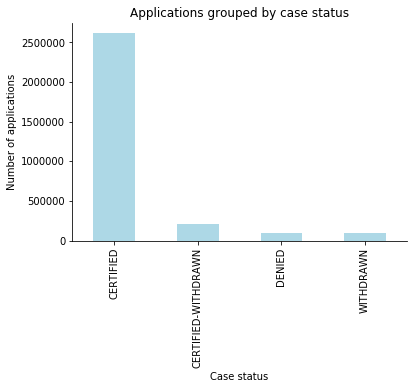

In [889]:
# Counting applications by case status
case_status = h1b_final['CASE_STATUS'].value_counts()
print '\nNumber of applications grouped by case status:\n\n', case_status
# Plot applications grouped by case status
ax = case_status.plot(kind='bar', stacked=True, title='Applications grouped by case status', color='lightblue')
ax.set_xlabel("Case status")
ax.set_ylabel('Number of applications')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Number of applications grouped by year:

2016    647715
2015    618612
2014    518911
2013    441653
2012    415142
2011    355863
Name: YEAR, dtype: int64


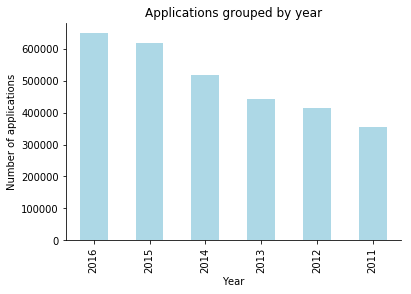

In [890]:
# Counting applications by year
year = h1b_final['YEAR'].value_counts()
print '\nNumber of applications grouped by year:\n\n', year

# Plot applications grouped by year
ax = year.head(10).plot(kind='bar', stacked=True, title='Applications grouped by year', color='lightblue')
ax.set_xlabel("Year")
ax.set_ylabel('Number of applications')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Number of applications grouped by worksite:

NEW YORK, NEW YORK           191431
HOUSTON, TEXAS                83767
SAN FRANCISCO, CALIFORNIA     62720
ATLANTA, GEORGIA              52124
CHICAGO, ILLINOIS             51425
Name: WORKSITE, dtype: int64


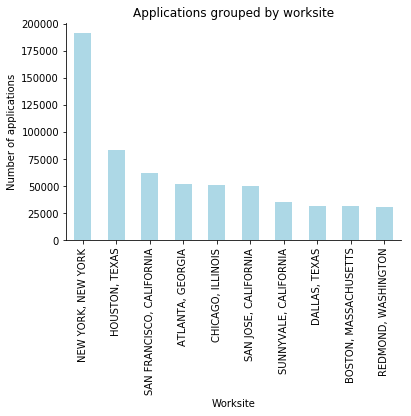

In [891]:
# Counting applications by worksite
worksite = h1b_final['WORKSITE'].value_counts()
print '\nNumber of applications grouped by worksite:\n\n', worksite.head(5)

# Plot applications grouped by worksite
ax = worksite.head(10).plot(kind='bar', stacked=True, title='Applications grouped by worksite', color='lightblue')
ax.set_xlabel("Worksite")
ax.set_ylabel('Number of applications')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Number of applications grouped by job title:

PROGRAMMER ANALYST     248557
SOFTWARE ENGINEER      121167
COMPUTER PROGRAMMER     70422
SYSTEMS ANALYST         61882
SOFTWARE DEVELOPER      42848
Name: JOB_TITLE, dtype: int64


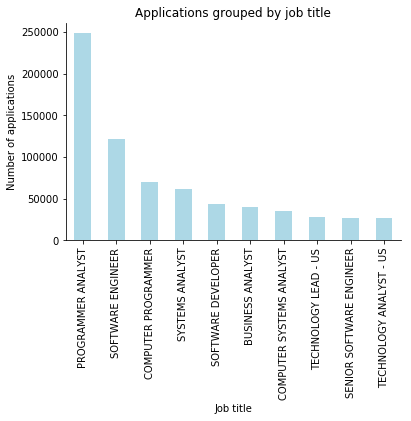

In [892]:
# Counting applications by job title
job_title = h1b_final['JOB_TITLE'].value_counts()
print '\nNumber of applications grouped by job title:\n\n', job_title.head(5)

# Plot applications grouped by job title
ax = job_title.head(10).plot(kind='bar', stacked=True, title='Applications grouped by job title', color='lightblue')
ax.set_xlabel("Job title")
ax.set_ylabel('Number of applications')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Number of applications grouped by prevailing wage:

60000.0    10351
55245.0     6842
62566.0     6649
58053.0     5739
52499.0     5561
Name: PREVAILING_WAGE, dtype: int64


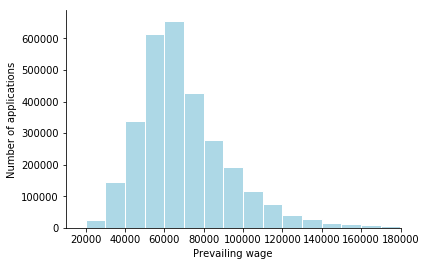

In [893]:
# Counting applications by prevailing wage
prevailing_wage = h1b_final['PREVAILING_WAGE'].value_counts()
print '\nNumber of applications grouped by prevailing wage:\n\n', prevailing_wage.head(5)

# Plot applications grouped by prevailing wage
_, ax = plt.subplots()
ax.hist(h1b_final['PREVAILING_WAGE'], bins=100, facecolor='lightblue', edgecolor='w')
ax.set_xlabel("Prevailing wage")
ax.set_ylabel('Number of applications')
plt.xlim([10000, 180000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



Number of applications grouped by job title:

INFOSYS LIMITED                      130531
TATA CONSULTANCY SERVICES LIMITED     64675
WIPRO LIMITED                         48017
DELOITTE CONSULTING LLP               36728
IBM INDIA PRIVATE LIMITED             34186
Name: EMPLOYER_NAME, dtype: int64


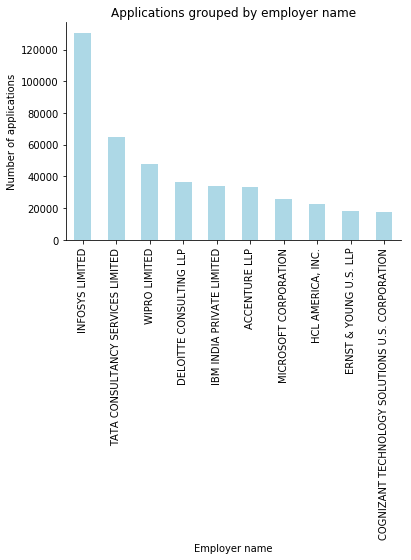

In [894]:
# Counting applications grouped by employer name
employer_name = h1b_final['EMPLOYER_NAME'].value_counts()
print '\nNumber of applications grouped by job title:\n\n', employer_name.head(5)

# Plot applications grouped by employer name
ax = employer_name.head(10).plot(kind='bar', stacked=True, title='Applications grouped by employer name', color='lightblue')
ax.set_xlabel("Employer name")
ax.set_ylabel('Number of applications')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [895]:
# Show the calculated statistics
print("Statistics for H1-B Visa Applications:\n")
print("Minimum wage: ${:,.2f}".format(min(features_raw['PREVAILING_WAGE'])))
print("Maximum wage: ${:,.2f}".format(max(features_raw['PREVAILING_WAGE'])))
print("Mean wage: ${:,.2f}".format(np.mean(features_raw['PREVAILING_WAGE'])))
print("Median wage ${:,.2f}".format(np.median(features_raw['PREVAILING_WAGE'])))
print("Standard deviation of wage: ${:,.2f}".format(np.std(features_raw['PREVAILING_WAGE'])))


Statistics for H1-B Visa Applications:

Minimum wage: $0.00
Maximum wage: $999,611.00
Mean wage: $70,407.48
Median wage $65,000.00
Standard deviation of wage: $26,714.00


,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR
0,BIOCHEMISTS AND BIOPHYSICISTS,N,0.036081,1.0


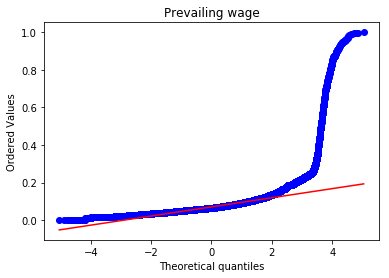

In [896]:
### Prepare the data
import scipy
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features by initializing a scaler and applying it to the features
scaler = MinMaxScaler()
numerical = ['YEAR', 'PREVAILING_WAGE']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

# Visualize skewed data and original data 
display(features_raw.head(1))
#vs.distribution(features_raw) #Check and confirm there is no need to treat skew data

# Check 'normality' of the features with a quantile-quantile (q-q) plot
scipy.stats.probplot(features_raw['PREVAILING_WAGE'], plot=plt)
plt.title('Prevailing wage')
plt.show()

In [897]:
### Data Preprocessing 
time0 = time()
outcome_raw = outcome_raw.apply(lambda x: 1 if x == 'CERTIFIED' else x)
outcome_raw = outcome_raw.apply(lambda x: 2 if x == 'CERTIFIED-WITHDRAWN' else x)
outcome_raw = outcome_raw.apply(lambda x: 3 if x == 'DENIED' else x)
outcome = outcome_raw.apply(lambda x: 4 if x == 'WITHDRAWN' else x)

features = pd.get_dummies(features_raw)

encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Show processing time in h:m:s
m, s = divmod(time()-time0, 60)
h, m = divmod(m, 60)
print("Time elapsed: %d:%02d:%02d" % (h, m, s))

2134 total features after one-hot encoding.
Time elapsed: 0:01:39


In [898]:
### Evaluating Model performance with Naive predictor
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, recall_score, classification_report
predictions_naive = pd.Series(np.ones(len(outcome), dtype = int))

# Naive performance using average = weighted for multiclass 
accuracy = accuracy_score(outcome, predictions_naive)
fscore = fbeta_score(outcome, predictions_naive, beta=0.5, average='weighted')
precision = precision_score(outcome, predictions_naive, average='weighted')

print 'Accuracy score:', accuracy
print 'F-score (weighted):', fscore
print 'Precision (weighted):', precision
print 'Recall (weighted):', recall_score(outcome, predictions_naive, average='weighted')
print '\nClassification Report:\n\n', classification_report(outcome, predictions_naive)


Accuracy score: 0.871803091235
F-score (weighted): 0.78004038305
Precision (weighted): 0.760040629886
Recall (weighted): 0.871803091235

Classification Report:

             precision    recall  f1-score   support

          1       0.87      1.00      0.93   2613575
          2       0.00      0.00      0.00    202652
          3       0.00      0.00      0.00     92257
          4       0.00      0.00      0.00     89412

avg / total       0.76      0.87      0.81   2997896



In [899]:
### Shuffle and split the data into training and testing subsets
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=11)

print "Training and testing split was successful."
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training and testing split was successful.
Training set has 2398316 samples.
Testing set has 599580 samples.


In [900]:
### Creating a Training and Predicting Pipeline (by Udacity)
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, precision_score, recall_score
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: outcome training set
       - X_test: features testing set
       - y_test: outcome testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set & on the first 10% of the training samples - X_train[:239831]
    start = time() 
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train)
    end = time()
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute precision on the training samples
    results['precision_train'] = precision_score(y_train, predictions_train, average='weighted')
    
    # Compute precision on test set
    results['precision_test'] = precision_score(y_test, predictions_test, average='weighted')
    
    # Compute F-score on the training samples
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5, average='weighted')
    
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='weighted')

    # Print all
    print("Training {}".format(learner.__class__.__name__))
    print("Precision result {}".format(results['precision_test'], learner.__class__.__name__))
    print("F-score result {}".format(results['f_test'], learner.__class__.__name__))
    print("Recall result {}".format(recall_score(y_test, predictions_test, average='weighted'), learner.__class__.__name__))

    # Return the results
    return results
    
print('Done')

Done


In [901]:
### Initial Model Evaluation: Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
time0 = time()

# Initialize the three models
clf_A = LogisticRegression(penalty='l2', random_state=24)
clf_B = RandomForestClassifier(n_estimators=10, random_state=16)
clf_C = DecisionTreeClassifier(random_state=41)

# Collect results on the learners
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

# Show processing time in h:m:s
m, s = divmod(time()-time0, 60)
h, m = divmod(m, 60)
print("Time elapsed: %d:%02d:%02d" % (h, m, s))


Training LogisticRegression
Precision result 0.846939717097
F-score result 0.782639224855
Recall result 0.872774275326
Training RandomForestClassifier
Precision result 0.831648492109
F-score result 0.833923520799
Recall result 0.870514360052
Training DecisionTreeClassifier
Precision result 0.832282104218
F-score result 0.834255591396
Recall result 0.872515761033
Time elapsed: 7:55:17


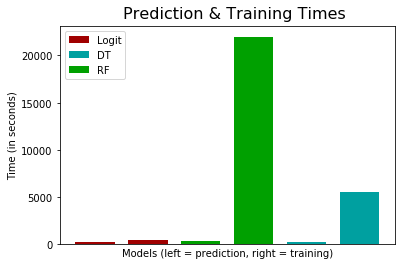

In [903]:
### Plot training & prediction times for all classifiers 
k = 0 # 1: Precision - 2: F-Score - 3: Training & Prediction times
vs.evaluate(results, 0, k)

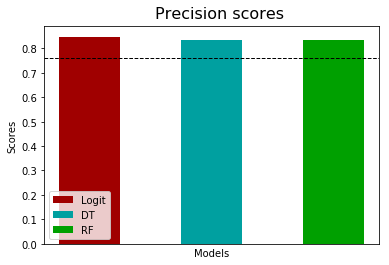

In [904]:
### Plot precision for all classifiers 
k = 1 # 1: Precision - 2: F-Score - 3: Training & Prediction times
vs.evaluate(results, precision, k)

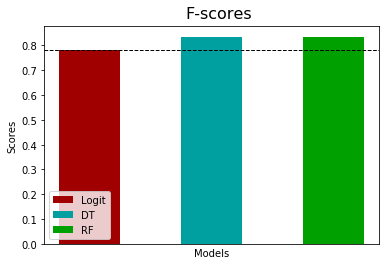

In [905]:
### Plot F-score for all classifiers 
k = 2 # 1: Precision - 2: F-Score - 3: Training & Prediction times
vs.evaluate(results, fscore, k)

In [902]:
### Model Tuning for Logistic Regression classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

time2 = time()

# Initialize the classifier
clf = LogisticRegression(random_state=82)

# Create the parameters list you wish to tune
param_grid = {'C': [1, 10, 100, 1000]}
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores 
print("Unoptimized model\n------")
print("Precision score: {:.4f}".format(precision_score(y_test, predictions, average='weighted')))
print("F-score: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5, average='weighted')))
print("\nOptimized Model\n------")
print("Final precision score: {:.4f}".format(precision_score(y_test, best_predictions, average='weighted')))
print("Final F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5, average='weighted')))

# Show processing time in h:m:s
m, s = divmod(time() - time2, 60)
h, m = divmod(m, 60)
print("\nTime elapsed to tune classifier: %d:%02d:%02d" % (h, m, s))

Unoptimized model
------
Precision score: 0.8469
F-score: 0.7826

Optimized Model
------
Final precision score: 0.8336
Final F-score: 0.7837

Time elapsed to tune classifier: 4:04:28


In [17]:
### Model Tuning Decision Tree classifier 
# Used on binary output (certified - denied) & 500.000 applications
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
time0 = time()

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=27)

# Create the parameters list you wish to tune
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
              'max_depth': [1,3,5,10,15], 'max_leaf_nodes': [2,5,10,15,30,50,100]}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(y_test, predictions, average='weighted')))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average='weighted')))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(y_test, best_predictions, average='weighted')))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))

# Show processing time in h:m:s
m, s = divmod(time()-time0, 60)
h, m = divmod(m, 60)
print("Time elapsed: %d:%02d:%02d" % (h, m, s))

Unoptimized model
------
Accuracy score on testing data: 0.9827
F-score on testing data: 0.9866

Optimized Model
------
Final accuracy score on the testing data: 0.9833
Final F-score on the testing data: 0.9866
Time elapsed: 2:39:14


In [883]:
### Model Tuning Random Forest classifier on 250.000 random applications
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
time0 = time()

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10)

clf.get_params().keys()

# Create the parameters list you wish to tune
parameters = {'max_leaf_nodes': [5, 10, 50, 100, 200, 500]}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(y_test, predictions, average='weighted')))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average='weighted')))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(y_test, best_predictions, average='weighted')))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))

# Show processing time in h:m:s
m, s = divmod(time()-time0, 60)
h, m = divmod(m, 60)
print("Time elapsed: %d:%02d:%02d" % (h, m, s))

Unoptimized model
------
Precision score on testing data: 0.8060
F-score on testing data: 0.8118

Optimized Model
------
Final precision score on the testing data: 0.8605
Final F-score on the testing data: 0.7883
Time elapsed: 0:04:14


In [906]:
### Make predictions using the final models
predictions_LR = clf_A.predict(X_test)
predictions_RF = clf_B.predict(X_test)
predictions_DT = clf_C.predict(X_test)

# Report the scores for the models
print("Random Forest:\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(y_test, predictions_RF, average='weighted')))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_RF, beta = 0.5, average='weighted')))
print("Recall on testing data: {:.4f}".format(recall_score(y_test, predictions_RF, average='weighted')))
print("\nDecision Tree:\n------")
print("Precision score on the testing data: {:.4f}".format(precision_score(y_test, predictions_DT, average='weighted')))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predictions_DT, beta = 0.5, average='weighted')))
print("Recall on testing data: {:.4f}".format(recall_score(y_test, predictions_DT, average='weighted')))
print("\nLogistic Regression:\n------")
print("Precision score on the testing data: {:.4f}".format(precision_score(y_test, predictions_LR, average='weighted')))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predictions_LR, beta = 0.5, average='weighted')))
print("Recall on testing data: {:.4f}".format(recall_score(y_test, predictions_LR, average='weighted')))


Random Forest:
------
Precision score on testing data: 0.8316
F-score on testing data: 0.8339
Recall on testing data: 0.8705

Decision Tree:
------
Precision score on the testing data: 0.8323
F-score on the testing data: 0.8343
Recall on testing data: 0.8725

Logistic Regression:
------
Precision score on the testing data: 0.8469
F-score on the testing data: 0.7826
Recall on testing data: 0.8728


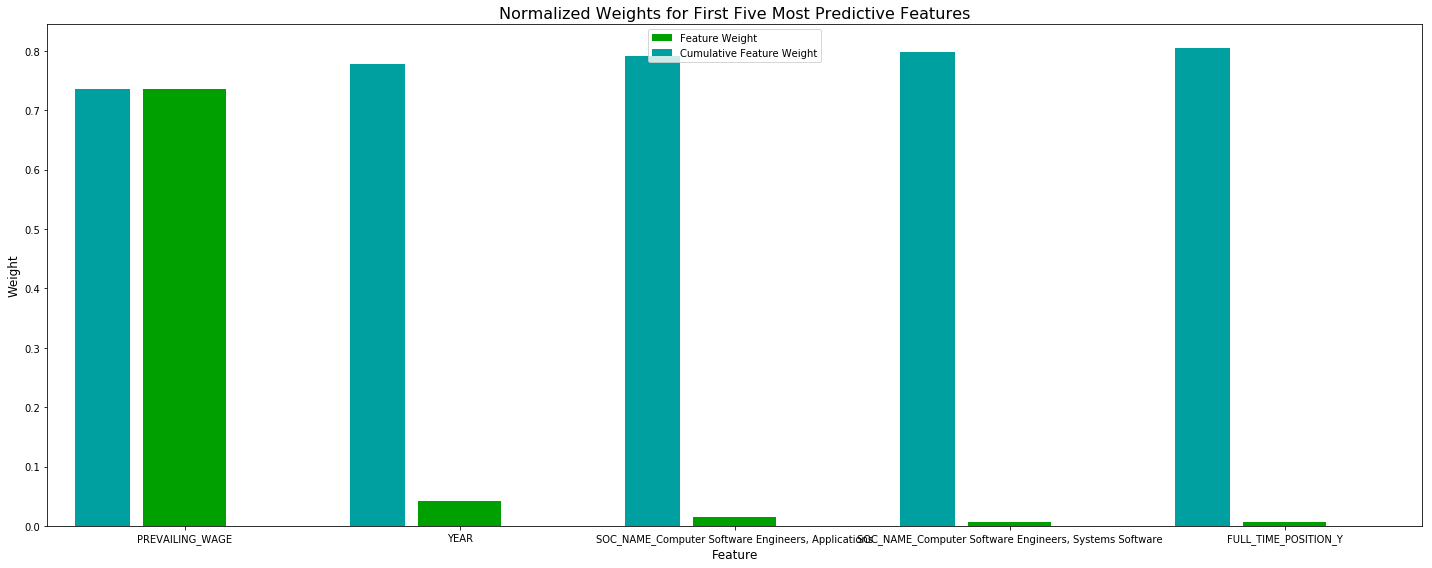

In [907]:
### Identifying most relevant features by using a supervised model with 'feature_importances_'

# Extract the feature importances using Decision Tree Classifier (clf_B for Random Forest)
importances = clf_C.feature_importances_

# Visualization 
vs.feature_plot(importances, X_train, y_train)

In [908]:
### Training using only most relevant features for less prediction time 
### (but at the cost of performance metrics) shows nonetheless decent results

# Import functionality for cloning a model
from sklearn.base import clone
time0 = time()

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the best model found from grid search earlier - (clf_B: Random Forest & clf_C: Decision Tree)
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
#clf = (clone(clf_C)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Precision on testing data: {:.4f}".format(precision_score(y_test, predictions_DT, average='weighted')))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_DT, beta = 0.5, average='weighted')))
print("\nFinal Model trained on reduced data\n------")
print("Precision on testing data: {:.4f}".format(precision_score(y_test, reduced_predictions, average='weighted')))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5, average='weighted')))

Final Model trained on full data
------
Precision on testing data: 0.8323
F-score on testing data: 0.8343

Final Model trained on reduced data
------
Precision on testing data: 0.7615
F-score on testing data: 0.7814


In [909]:
### Validate the robutsness of the Logistic Regression model using cross-validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf_A, X_test, y_test, scoring=scorer, cv=5)
print 'Logit cross validation score:', cross_score
score = best_clf.score(X_test, y_test)
print 'R^2 score:', score
print 'Mean score:', cross_score.mean()


Logit cross validation score: [ 0.78187132  0.782364    0.78263478  0.78259535  0.78215377]
R^2 score: 0.872737582975
Mean score: 0.782323843597


In [910]:
### Validate the robutsness of the Random Forest Tree classifier using cross-validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf_B, X_test, y_test, scoring=scorer, cv=5)
print 'RF cross validation score:', cross_score
score = best_clf.score(X_test, y_test)
print 'R^2 score:', score
print 'Mean score:', cross_score.mean()

RF cross validation score: [ 0.81908211  0.81793291  0.81948324  0.81909517  0.81979511]
R^2 score: 0.872737582975
Mean score: 0.81907770776


In [912]:
### Validate the robutsness of the Decision Tree classifier using cross-validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf_C, X_test, y_test, scoring=scorer, cv=5)
print 'DT cross validation score:', cross_score
score = best_clf.score(X_test, y_test)
print 'R^2 score:', score
print 'Mean score:', cross_score.mean()

DT cross validation score: [ 0.81980377  0.81968752  0.82078271  0.81933498  0.82095799]
R^2 score: 0.872737582975
Mean score: 0.820113393883


In [911]:
### Validate the robutsness of the best classifier using cross-validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(best_clf, X_test, y_test, scoring=scorer, cv=5)
print 'Best cross validation score:', cross_score
score = best_clf.score(X_test, y_test)
print 'R^2 score:', score
print 'Mean score:', cross_score.mean()

Best cross validation score: [ 0.78353127  0.78354941  0.78388193  0.78369918  0.7833574 ]
R^2 score: 0.872737582975
Mean score: 0.783603837683
